# Volume 4: Animation
    <Name>
    <Class>
    <Date>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [142]:
animation.writer = animation.writers['ffmpeg']

In [143]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

xs = np.linspace(-4, 4, 150)
ts = np.linspace(0,5,251)

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([-2,2])
plt.ylim([0,1.1])

# Create an empty line object
# plt.plot actually returns a list of objects; the trailing comma
# extracts the value from the list

line, = ax.plot([], [], 'r-')

def update(t):
    line.set_data(xs, np.exp(-xs**2/ (1+t)**2)/ (1+t))
    
ani = FuncAnimation(fig, update, frames = ts, interval = 20)
ani.save('my_animation.mp4')


## Problem 1

Use the FuncAnimation class to animate the function $y = \sin(x + 3t)$ where $x \in [0, 2\pi]$, and t ranges from 0 to 10 seconds.
Embed your animation into the notebook.

In [151]:
# Establish line spaces for x and t
xs = np.linspace(0, 2 * np.pi, 150)
ts = np.linspace(0,10, 500)

# Create figure and figure limits
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([0, 2*np.pi])
plt.ylim([-1, 1])

# Set up plot
line, = ax.plot([], [], 'r-')

# Set up update function
def update(t):
    line.set_data(xs, np.sin(xs + 3*t))
  
# Create animation  
ani = FuncAnimation(fig, update, frames = ts, interval = 20)

# Format chart
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Y = sin(x+3t)')

# Save .mp4 file
plt.ioff()
ani.save('Problem1.mp4')

# Render as html5 and embed
HTML(ani.to_html5_video())


<video src="Problem1.mp4" controls>

## Problem 2

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

Use `np.load('orbits.npz')` to load the data for the four planets' orbits. Create a 3D plot of the planet orbits, the starting positions of each planet as a point, and the position of the sun as a point, and compare your results with Figure 1.1. Make sure to include a legend.

[0.346      0.341614   0.33661761 ... 0.33622622 0.34063931 0.34464325] [ 0.0337      0.04832653  0.06286659 ... -0.20734389 -0.19457255
 -0.18156756] [-0.029      -0.02740384 -0.02575872 ... -0.04777499 -0.04713767
 -0.04644373]


/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_16637/4250232087.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(merc_x[0], merc_y[0], merc_z[0], 'go', marker = '.', markersize = 10)
/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_16637/4250232087.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "mo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(venus_x[0], venus_y[0], venus_z[0], 'mo', marker = '.', markersize = 10)
/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_16637/4250232087.py:27: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(earth_x[0], earth_y[0], earth_z[0], 'bo', marker = '.', markersize = 10)
/var/folders/td/8px6smg12

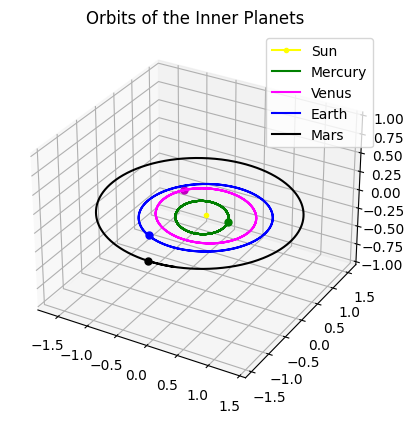

In [160]:
# Load in planet data
planet_data = np.load('orbits.npz')

# Separate data by planet
mercury_data = planet_data['mercury']
venus_data = planet_data['venus']
earth_data = planet_data['earth']
mars_data = planet_data['mars']

# Separate x, y, z data
merc_x, merc_y, merc_z = mercury_data.T
venus_x, venus_y, venus_z = venus_data.T
earth_x, earth_y, earth_z = earth_data.T
mars_x, mars_y, mars_z = mars_data.T

# Create a figure object
fig = plt.figure()

# Create figure plot
ax = fig.add_subplot(111, projection = '3d')

# Plot data
ax.plot([0],[0],[0], 'yellow', marker = '.', label = 'Sun')
ax.plot(merc_x[0], merc_y[0], merc_z[0], 'go', marker = '.', markersize = 10)
ax.plot(venus_x[0], venus_y[0], venus_z[0], 'mo', marker = '.', markersize = 10)
ax.plot(earth_x[0], earth_y[0], earth_z[0], 'bo', marker = '.', markersize = 10)
ax.plot(mars_x[0], mars_y[0], mars_z[0], 'ko', marker = '.', markersize = 10)
ax.plot(merc_x, merc_y, merc_z, 'green', label = 'Mercury')
ax.plot(venus_x, venus_y, venus_z, 'magenta', label = 'Venus')
ax.plot(earth_x, earth_y, earth_z, 'blue', label = 'Earth')
ax.plot(mars_x, mars_y, mars_z, 'black', label = 'Mars')

# Format chart
ax.legend()
ax.set_title("Orbits of the Inner Planets")
ax.set_zlim3d(-1, 1)
plt.show()

## Problem 3

Each row of the arrays in `orbits.npz` gives the position of the planets at a particular time. The arrays have 1400 points in time over a 700 day period (beginning on 2018-5-30). Create a 3D animation of the planet orbits. Display lines for the trajectories of the orbits and points for the sun and current positions of the planets at each point in time. Your update() function will need to return a list of `Line3D` objects, one for each orbit trajectory and one for each planet position marker. Include a legend, and embed your animation in the notebook.

In [1]:
# Create figure and limits
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlim3d(-1.6, 1.6)
ax.set_ylim3d(-1.6, 1.6)
ax.set_zlim3d(-1, 1)

# Plot Position of Planets
merc_point, = ax.plot([], [], [], 'g', marker = 'o', label = "Mercury")
venus_point, = ax.plot([], [], [], 'm', marker = 'o', label = "Venus")
earth_point, = ax.plot([], [], [], 'b', marker = 'o', label = "Earth")
mars_point, = ax.plot([], [], [], 'k', marker = 'o', label = "Mars")

# Plot Trajectory of Planets
merc_line, = ax.plot([], [], [], 'g-')
venus_line, = ax.plot([], [], [], 'm-')
earth_line, = ax.plot([], [], [], 'b-')
mars_line, = ax.plot([], [], [], 'k-')

# Create update function
def update(t):
    merc_point.set_data_3d([merc_x[t]], [merc_y[t]], [merc_z[t]])
    venus_point.set_data_3d([venus_x[t]], [venus_y[t]], [venus_z[t]])
    earth_point.set_data_3d([earth_x[t]], [earth_y[t]], [earth_z[t]])
    mars_point.set_data_3d([mars_x[t]], [mars_y[t]], [mars_z[t]])
    merc_line.set_data_3d(merc_x[:t+1], merc_y[:t+1], merc_z[:t+1])
    venus_line.set_data_3d(venus_x[:t+1], venus_y[:t+1], venus_z[:t+1])
    earth_line.set_data_3d(earth_x[:t+1], earth_y[:t+1], earth_z[:t+1])
    mars_line.set_data_3d(mars_x[:t+1], mars_y[:t+1], mars_z[:t+1])
    
    return merc_point, merc_line, venus_point, venus_line, earth_point, earth_line, mars_point, mars_line
    
# Format chart
ax.legend()
ax.set_title("Problem 3 - Animation of Solar System")

# Create and save animation
ani = FuncAnimation(fig, update, frames = range(700), interval = 17)
ani.save('Problem3.mp4')
plt.ioff()

# Render as html5 and embed
HTML(ani.to_html5_video())
    

NameError: name 'plt' is not defined

## Problem 4

Make a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{\det(2\pi\Sigma)}}\exp[-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})]$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

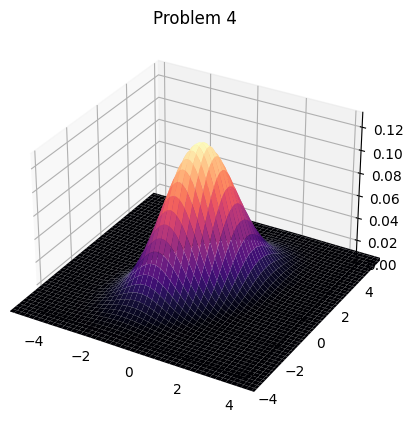

In [3]:
# Define x and y linspaces
x = np.linspace(-5,5, 100)
y = np.linspace(-5, 5, 100)

# Make a mesh grid of X and Y
X,Y = np.meshgrid(x,y)

# Define mu, sigma, and inverse sigma
mu = np.array([0,0])
sigma = np.array([[1,0.6], [0.6,2]])
inv_sigma = np.linalg.inv(sigma)
beginning_constant =1/np.sqrt(np.linalg.det(2*np.pi*sigma))

# Create the lambda function
f = lambda x: beginning_constant * np.exp(-0.5 * np.dot(np.dot((x- mu), inv_sigma), (x-mu)))

# Build surface
Z = np.array([[f(np.array([X[i,j], Y[i,j]])) for j in range(Y.shape[0])] for i in range(X.shape[0])])


# Set plot parameters
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlim(-4.1, 4.1)
ax.set_ylim(-4.1, 4.1)
ax.set_zlim(0, 0.13)

# Plot surface
ax.plot_surface(X,Y,Z, cmap = "magma")
plt.title("Problem 4")
plt.show()









## Problem 5

Use the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

Load the data with `np.load('vibration.npz')`. Create a 3D surface animation of the vibrating membrane. Embed the animation in the notebook.

In [150]:
# Load in data
x_data = np.load('x.npy')
y_data = np.load('y.npy')
z_data = np.load('z.npy')

# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# Create update function
def update(t):
    ax.clear()
    ax.plot_surface(x_data, y_data, z_data[t][:][:])
    ax.set_zlim3d([-3, 3])
    ax.set_title("Problem 5 Animation")

# Create and save animation
ani = FuncAnimation(fig, update, frames = 150, interval = 6000/150)
ani.save('Problem5.mp4')
plt.ioff()

# Render as html5 and embed
HTML(ani.to_html5_video())

(300, 200)
(300, 200)
(150, 300, 200)


<video src="Problem5.mp4" controls>

### Don't forget to push your .mp4 animation files!